In [13]:
import numpy as np
import nnfs
from nnfs.datasets import vertical_data
import matplotlib.pyplot as plt

nnfs.init()

# Code up to this point:
class LayerDense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
class ActivationRelu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class ActivationSoftmax:
    def forward(self, inputs):
        exp = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        probs = exp / np.sum(exp, axis = 1, keepdims = True)
        self.output = probs

# Loss and CCEL classes:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples), y_true
            ]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
            y_pred_clipped * y_true, axis=1)
            
        negative_loss_likelihoods = -np.log(correct_confidences)
        return negative_loss_likelihoods

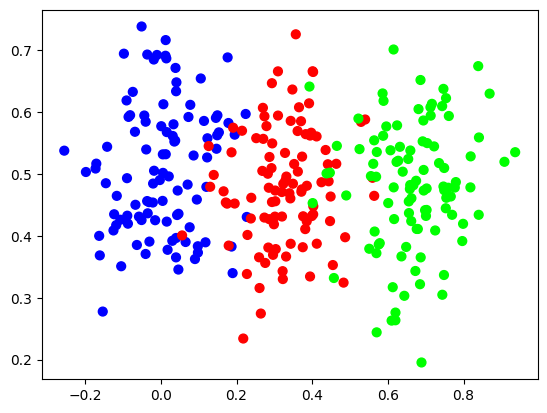

In [14]:
X,y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [16]:
# Cro-Mag Optimization -> Iterate through with random biases and weights finding the sets with the least loss
# we add a small random value to the existing 'best' set of biases and weights, if it yields lower loss,
# then we keep it. Else, discard and revert back to last most successful set

X,y = vertical_data(samples=100, classes=3)

dense1 = LayerDense(2,3)
activation1 = ActivationRelu()
dense2 = LayerDense(3,3)
activation2 = ActivationSoftmax()

loss_function = Loss_CategoricalCrossEntropy()

lowest_loss = 999_999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10_000):
    # update weights and biases
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases  += 0.05 * np.random.randn(1,3)
    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases  += 0.05 * np.random.randn(1,3)

    #forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    


[[0. 0. 0.]] [[ 0.00138811 -0.02127711  0.07109878]]
[[ 0.02281817 -0.02643353 -0.00540019]] [[0.04770948 0.02720724 0.02236061]]
[[-0.00798789 -0.00311903  0.08034138]] [[-0.00713439 -0.06138182  0.00190637]]
[[0.01764799 0.00031093 0.06672758]] [[-0.01693411  0.10173813  0.05270889]]
[[0.06518967 0.02827588 0.0135428 ]] [[-0.04884477 -0.029479   -0.10894658]]
[[ 0.03370715 -0.00438835  0.0174685 ]] [[-0.01668955 -0.00100646  0.03875117]]
[[ 0.05534904 -0.04482423 -0.0377377 ]] [[-0.05709507 -0.06554852 -0.07664605]]
[[-0.03024948 -0.04251748 -0.08565642]] [[-0.00770362  0.05968058 -0.00490806]]
[[-0.07458019 -0.04988516 -0.0326661 ]] [[-0.02375876  0.06364769 -0.08480656]]
[[-0.03807101 -0.14275932 -0.01353619]] [[0.07433912 0.00213899 0.02508999]]
[[-0.04087599 -0.11583747  0.0106309 ]] [[ 0.05402721 -0.08038383  0.02280818]]
[[-0.08811949 -0.08729804  0.08777072]] [[-0.03258281  0.02524077  0.06515905]]
[[-0.08169267 -0.09442043  0.02233254]] [[-0.03696977 -0.018798   -0.11860969]]

[[0.06074492 0.47435006 1.3729476 ]] [[0.10054474 0.00684283 0.0133314 ]]
[[0.08704311 0.4486417  1.3666756 ]] [[ 0.02173248  0.04514034 -0.06372826]]
[[0.04661384 0.45940003 1.4220219 ]] [[0.01446034 0.01140767 0.00944483]]
[[0.01339177 0.44108537 1.3987507 ]] [[ 0.02690856 -0.03494702 -0.03171352]]
[[0.04730958 0.35470662 1.4039047 ]] [[-0.01173517 -0.12768476 -0.02176382]]
[[0.01048227 0.38924712 1.4909854 ]] [[-0.07546916 -0.00526111  0.02473267]]
[[0.07570474 0.36281535 1.5174544 ]] [[ 0.04802076  0.05103804 -0.08882963]]
[[0.09133337 0.33681655 1.4822783 ]] [[-0.01243843  0.00242845  0.0495421 ]]
[[0.17730474 0.39375982 1.5025302 ]] [[-0.09994325 -0.0256832   0.07834905]]
[[0.10304029 0.45224732 1.5111004 ]] [[-0.02004733 -0.03719366 -0.05075533]]
[[0.11446264 0.426247   1.5997939 ]] [[-0.00016491 -0.04727718  0.00260666]]
[[0.1614952 0.4973673 1.6350534]] [[-0.00086015 -0.01529635 -0.05766686]]
[[0.17618269 0.4408456  1.5582423 ]] [[ 0.05285445 -0.03786745 -0.0764897 ]]
[[0.1938

[[-0.07022249  1.6371764   1.6695412 ]] [[-0.05801053 -0.00335689  0.01082453]]
[[-0.16988154  1.6374427   1.6573343 ]] [[-0.01017753  0.02391015  0.042107  ]]
[[-0.08627673  1.5946145   1.632356  ]] [[ 0.08663604 -0.02674807 -0.00364483]]
[[-0.10101975  1.5207434   1.6565282 ]] [[-0.00246489 -0.02126396  0.06181325]]
[[-0.09664541  1.5418756   1.6601473 ]] [[-0.12458699 -0.10471874  0.06236978]]
[[-0.19520998  1.4730092   1.6691846 ]] [[ 0.03144605 -0.01272562  0.04037785]]
[[-0.14554262  1.4375541   1.7931498 ]] [[ 0.02955512  0.03489723 -0.02047049]]
[[-0.14022861  1.5143946   1.7321935 ]] [[0.06080328 0.02181837 0.00160658]]
[[-0.10377575  1.4858948   1.7229694 ]] [[-0.03285908  0.07335903  0.03926604]]
[[-0.08499335  1.5168684   1.7393336 ]] [[0.03416515 0.01600738 0.01214157]]
[[-0.12517925  1.5282815   1.7064624 ]] [[ 0.0548862  -0.00404923 -0.00627227]]
[[-0.06397809  1.5690949   1.7651066 ]] [[-0.01998713  0.04354181  0.05247467]]
[[-0.00336716  1.6231389   1.769552  ]] [[-0.0

[[ 0.594362    1.5761238  -0.01222324]] [[-0.04316457 -0.03869352 -0.04451641]]
[[ 0.595882    1.4971423  -0.10626141]] [[-0.07366873  0.01666862  0.0646014 ]]
[[ 0.5912039   1.4232625  -0.21719089]] [[ 0.09694902  0.0683135  -0.01378783]]
[[ 0.57232153  1.4247103  -0.19583525]] [[0.11569118 0.03083019 0.02547118]]
[[ 0.5824553   1.3825055  -0.22371516]] [[0.00719081 0.00361892 0.07311896]]
[[ 0.617144    1.3859831  -0.11507067]] [[ 0.0275331  -0.06277042  0.0460628 ]]
[[ 0.63609076  1.4067941  -0.07064996]] [[-0.07256971  0.00336877  0.06655849]]
[[ 0.5909282   1.3472944  -0.02525952]] [[-0.01199085  0.05359389 -0.01384874]]
[[0.6326361  1.3016524  0.00485508]] [[ 0.05786796 -0.1790523  -0.04721604]]
[[ 0.5998188   1.2018617  -0.01652013]] [[-0.11251476  0.04811809 -0.04601464]]
[[ 0.62759024  1.2765452  -0.05921204]] [[ 0.06955271 -0.04416256 -0.02685325]]
[[ 0.48849234  1.3268062  -0.05775403]] [[-0.01832074  0.01887127 -0.01818824]]
[[ 0.5404038   1.3731575  -0.00820438]] [[ 0.0394

[[-0.4074369  1.2650031 -0.6101538]] [[-0.02525523  0.0130174  -0.08400304]]
[[-0.50962794  1.2258621  -0.56825995]] [[-0.04150836 -0.07465946  0.10694895]]
[[-0.5085738   1.2308499  -0.55128396]] [[0.02793191 0.10948762 0.00644737]]
[[-0.55245066  1.2564086  -0.5203884 ]] [[-0.00399795  0.04412217  0.05781862]]
[[-0.57216835  1.211869   -0.43540138]] [[-0.02762378  0.02065668 -0.03108063]]
[[-0.5227268   1.1952776  -0.28212333]] [[ 0.05617404  0.00593309 -0.00088425]]
[[-0.41939324  1.2457682  -0.21336097]] [[-0.01813077  0.01062329  0.03946877]]
[[-0.37925872  1.1758106  -0.2293616 ]] [[-0.02888603 -0.08038346  0.01867277]]
[[-0.39080393  1.1755738  -0.23809789]] [[-0.0875773   0.00270314  0.07257511]]
[[-0.27811807  1.2118368  -0.25693962]] [[-0.02823416  0.06953917  0.01392618]]
[[-0.32093555  1.2288632  -0.19872151]] [[-0.021978    0.00144373  0.02663514]]
[[-0.27540743  1.2644576  -0.19454859]] [[-0.07192842  0.05940754 -0.02568688]]
[[-0.2909095   1.3575525  -0.18356508]] [[ 0.0

[[-0.37178946  0.65566117  0.3113846 ]] [[0.04089331 0.05479854 0.02816905]]
[[-0.35125956  0.6348351   0.33303127]] [[-0.02159224  0.04575075  0.03095737]]
[[-0.30289775  0.6064165   0.28641093]] [[ 0.02644598 -0.0988315  -0.00017195]]
[[-0.3412292   0.6460836   0.32942864]] [[-0.00183739  0.03345415 -0.01864071]]
[[-0.35173932  0.649979    0.28033388]] [[-0.07077035  0.0729928   0.04155255]]
[[-0.37286016  0.64915264  0.29341224]] [[ 0.05487965  0.07115253 -0.00433697]]
[[-0.45747396  0.6354111   0.3541176 ]] [[0.00684581 0.05642128 0.07272161]]
[[-0.37934542  0.6280643   0.36375567]] [[-0.04514426  0.01913953 -0.02451546]]
[[-0.37198627  0.6540119   0.34455788]] [[-0.07403835  0.05875447  0.032093  ]]
[[-0.2835614   0.6269032   0.34571174]] [[-0.05287464  0.05031071  0.05607839]]
[[-0.2498458   0.70391756  0.37093735]] [[-0.07918176  0.05453018 -0.02750734]]
[[-0.2992708   0.69705695  0.43107435]] [[ 0.05896424 -0.04115748  0.09584101]]
[[-0.2857359  0.6604409  0.4744097]] [[ 0.0097

[[-1.8101882   0.85448664  0.607055  ]] [[-0.0884474  -0.07822823  0.0352056 ]]
[[-1.7516235   0.77782726  0.69418776]] [[-0.00101248 -0.0592383  -0.08431082]]
[[-1.7706026  0.7618357  0.7071292]] [[-0.03013426 -0.01495849 -0.07161483]]
[[-1.750435    0.7867604   0.67593783]] [[ 0.05096142 -0.05501059  0.07996731]]
[[-1.7462223  0.7723487  0.592732 ]] [[0.02866421 0.02687401 0.0023948 ]]
[[-1.7158198   0.8686519   0.58648413]] [[-0.01872894  0.02656787 -0.03938068]]
[[-1.7499089   0.7792407   0.62222916]] [[-0.03423042  0.04136315  0.01882282]]
[[-1.688809   0.7963633  0.5246249]] [[-0.0261397   0.02188257 -0.05442355]]
[[-1.6997582   0.7874982   0.51354957]] [[-0.0181247   0.06696074 -0.05898729]]
[[-1.6822705  0.8755509  0.5691329]] [[-0.00219303  0.0302866   0.11685776]]
[[-1.6009051   0.90040183  0.57792944]] [[-0.07660309  0.02841659 -0.05706134]]
[[-1.6013587   0.92523414  0.5305445 ]] [[-0.02872526  0.00738781  0.04708244]]
[[-1.7748765   0.8984369   0.56731963]] [[-0.00415477 -

[[-1.7501428   0.47486854  1.2891313 ]] [[ 0.03233216 -0.0553088   0.02393389]]
[[-1.7180704   0.53925157  1.317794  ]] [[-0.0084435   0.06654613  0.06866376]]
[[-1.6817951   0.55258113  1.3865464 ]] [[-0.0397562   0.07367876  0.0824241 ]]
[[-1.5823926  0.5463694  1.3944995]] [[0.06009088 0.046859   0.01005837]]
[[-1.6725603   0.57162315  1.3663112 ]] [[0.01696123 0.0371321  0.02918874]]
[[-1.7084708  0.5871665  1.364065 ]] [[ 0.00670689  0.03507128 -0.02571336]]
[[-1.6940527  0.4972614  1.2883966]] [[-0.01282144 -0.05072303 -0.04346418]]
[[-1.6813204   0.52568614  1.3533727 ]] [[-0.04069374  0.04087137 -0.0101753 ]]
[[-1.6743826   0.47326615  1.2944239 ]] [[0.00857956 0.07541713 0.00293309]]
[[-1.6363131   0.44292623  1.2046064 ]] [[-0.00034667 -0.03243355 -0.0349842 ]]
[[-1.57124     0.45599878  1.1927395 ]] [[ 0.01638078 -0.02978447 -0.00449065]]
[[-1.6117362   0.40881294  1.1842754 ]] [[0.00223113 0.01014187 0.03271556]]
[[-1.5094633   0.33488277  1.2018974 ]] [[0.03867882 0.166856

[[-2.1120121 -0.5909064  2.5712996]] [[-0.03998203 -0.01798046  0.02849989]]
[[-2.19295   -0.6026817  2.5938284]] [[ 0.02763829 -0.06931283 -0.01954284]]
[[-2.1447992 -0.6394187  2.6868575]] [[-0.03255467  0.0414995  -0.01724773]]
[[-2.113997   -0.61915535  2.6521788 ]] [[-0.03622397 -0.06129485  0.03466167]]
[[-2.11294   -0.610271   2.6269696]] [[ 0.09342274 -0.00289931 -0.02894978]]
[[-2.142719  -0.6109845  2.5279384]] [[-0.13989884 -0.06367223  0.04838843]]
[[-2.0964305 -0.5508371  2.4587393]] [[-0.00808465 -0.01828075 -0.04679919]]
[[-2.1777587 -0.63643    2.5088422]] [[-0.00969919  0.06688686  0.06581639]]
[[-2.191961  -0.6278025  2.456049 ]] [[ 0.04429111 -0.05303609  0.04078126]]
[[-2.1565452 -0.6402189  2.436408 ]] [[ 0.00597315 -0.07170953 -0.00796845]]
[[-2.1883225  -0.77074206  2.3350759 ]] [[ 0.02488029  0.08445299 -0.11606091]]
[[-2.1700404 -0.7649451  2.3794181]] [[ 0.03917347 -0.00145104  0.01242007]]
[[-2.1435325 -0.7141759  2.3737683]] [[-0.06810581 -0.0695695  -0.0409

[[-1.9033923 -1.3333038  1.9865017]] [[-0.00574314 -0.01349405 -0.01856273]]
[[-1.8921695 -1.3375784  1.9835321]] [[-0.01333309  0.13473487  0.00217205]]
[[-1.92452   -1.2476773  1.9185854]] [[-0.00155269  0.01694155  0.03931581]]
[[-1.9635012 -1.2822509  1.8740288]] [[ 0.03190224 -0.02738694 -0.07171994]]
[[-1.920992  -1.2520245  1.8485872]] [[-0.03075843  0.01676658 -0.00603282]]
[[-1.917171  -1.2669698  1.7708486]] [[0.02963156 0.00085783 0.01136831]]
[[-1.941727  -1.2562506  1.8003178]] [[ 0.00790888 -0.05829295 -0.06434207]]
[[-1.902776  -1.1963729  1.8262153]] [[-0.05630833  0.04322448  0.00100007]]
[[-1.9284211 -1.1727014  1.8237749]] [[ 0.07366327 -0.00325392 -0.13143621]]
[[-1.8732575 -1.183109   1.8376442]] [[ 0.11743068 -0.07052904  0.02707856]]
[[-1.8898022 -1.2476941  1.8290478]] [[ 0.01005364 -0.02973574 -0.02479995]]
[[-1.8629522 -1.2274734  1.7991354]] [[0.03062868 0.03931708 0.02965328]]
[[-1.8837271 -1.2636229  1.7607827]] [[ 0.03676504  0.00978779 -0.03862063]]
[[-1.

[[-1.119132   1.393058   0.3731966]] [[0.03418319 0.06270371 0.05675381]]
[[-1.0632917   1.3897014   0.34680483]] [[ 0.0451032  -0.00597869 -0.02877411]]
[[-1.1187811   1.3843404   0.30008933]] [[-0.05546349 -0.06923651 -0.01906042]]
[[-1.1386172   1.4205346   0.30788037]] [[-0.02099145 -0.02843502 -0.06935059]]
[[-1.1647192  1.4933022  0.3373876]] [[ 0.00892686  0.08874215 -0.01258521]]
[[-1.105701    1.4731811   0.34746513]] [[-0.04609139 -0.06537162 -0.03798132]]
[[-1.1122165   1.5081714   0.42884535]] [[ 0.01177494 -0.02657462 -0.02824522]]
[[-1.2232888   1.5361254   0.48816872]] [[-0.06760919 -0.03371106  0.09541714]]
[[-1.2063236  1.4758241  0.4716228]] [[ 0.01376785  0.05201662 -0.0318561 ]]
[[-1.2174622  1.4619771  0.4447018]] [[ 0.01436366  0.00304626 -0.06325274]]
[[-1.2281928  1.4338173  0.492355 ]] [[ 0.03259051 -0.00585708 -0.05476637]]
[[-1.2111093  1.4485807  0.49508  ]] [[ 0.04925489 -0.01903048 -0.08421157]]
[[-1.2262943   1.3900564   0.54518193]] [[0.09069315 0.017630

[[-0.55074394  1.4260536   0.09280184]] [[ 0.08594847 -0.07388453  0.02940651]]
[[-0.52560836  1.5693591   0.08730849]] [[ 2.8010888e-02 -4.0691521e-02  2.2613835e-05]]
[[-0.4716449   1.4625514   0.13399087]] [[ 0.04200412  0.00359153 -0.01151188]]
[[-0.55278254  1.5252115   0.10101359]] [[-0.01927506  0.00697247  0.07780664]]
[[-0.53677565  1.5064807  -0.06550828]] [[-0.0390246   0.0919305  -0.02319742]]
[[-0.54329574  1.5296947  -0.04438726]] [[ 0.00214543 -0.04403814  0.01251821]]
[[-0.5563326   1.5647248  -0.03926709]] [[-0.06129953  0.02642765 -0.05289407]]
[[-0.53947896  1.5562173  -0.02873297]] [[ 0.0065351   0.06878654 -0.00682308]]
[[-0.51028943  1.523683    0.02318069]] [[-0.03592207  0.04087683  0.01053734]]
[[-0.53743756  1.5178397   0.1611996 ]] [[ 0.06136987 -0.01207256 -0.04450343]]
[[-0.5148367   1.5429094   0.09950361]] [[-0.03963662  0.05944306  0.06914524]]
[[-0.46477556  1.5504553   0.06952376]] [[ 0.05928962  0.0112135  -0.01041021]]
[[-0.4560365  1.6214365  0.0260

[[-1.3754938   2.6059983  -0.04615295]] [[0.01350094 0.02389581 0.01416752]]
[[-1.370637    2.5406802  -0.08451521]] [[-0.02410361  0.04319745  0.04066604]]
[[-1.3661972   2.5250506   0.06745133]] [[ 0.02597991 -0.02089836  0.03271751]]
[[-1.342731    2.5678267   0.07169143]] [[-0.00310143  0.05209024  0.06303797]]
[[-1.3864323   2.5837762   0.08634076]] [[ 0.00676211 -0.00794108 -0.05517591]]
[[-1.4057839   2.5773466   0.08328289]] [[ 0.03080326  0.11507354 -0.05917294]]
[[-1.4502842   2.5649889   0.10664332]] [[0.03097771 0.01659103 0.04163625]]
[[-1.4475946   2.54722     0.00473819]] [[0.01238487 0.0572133  0.04106962]]
[[-1.5524945   2.5476387  -0.13527781]] [[ 0.00339908  0.09800276 -0.10310867]]
[[-1.671082    2.5466082  -0.20411342]] [[-0.00881163  0.01905468 -0.01075053]]
[[-1.661436   2.6120815 -0.2576324]] [[-0.02116772 -0.03348883  0.01987235]]
[[-1.6527307   2.598376   -0.26112065]] [[-0.06049791 -0.0100985   0.06250793]]
[[-1.7071936   2.7196367  -0.22034617]] [[-0.0173626

[[-1.977572   3.1824872  1.634541 ]] [[ 0.13044633 -0.03316723 -0.0117661 ]]
[[-1.988637   3.1450748  1.6239538]] [[-0.01015742  0.0367692   0.00029279]]
[[-1.9818978  3.0896022  1.6340953]] [[-0.09743907  0.05955771  0.0137789 ]]
[[-1.9962842  3.0401282  1.6164755]] [[0.02589068 0.08367664 0.01332774]]
[[-2.0676095  3.0183146  1.5987885]] [[-0.00925072  0.0584445  -0.03107782]]
[[-2.1039848  2.998362   1.5967067]] [[ 0.01790023  0.08112934 -0.0243598 ]]
[[-2.0699658  2.9878592  1.6037339]] [[-0.01528686 -0.00449618  0.00895711]]
[[-2.0270615  2.9439213  1.6274265]] [[ 0.09077001 -0.07888501 -0.02753581]]
[[-1.9959345  2.9283533  1.5786084]] [[-0.0451988  -0.08692992  0.01033691]]
[[-2.008819   2.9047918  1.5535084]] [[-0.08761306 -0.05272463  0.02664774]]
[[-2.0295074  2.9795787  1.4971951]] [[-0.02694542  0.01820989  0.0570766 ]]
[[-2.0097303  2.9869773  1.4192374]] [[ 0.04411085  0.05324693 -0.07294771]]
[[-2.0496929  2.9784095  1.4411843]] [[-0.06862553  0.10377844  0.01962585]]
[[

[[-2.035337   2.6170452  3.2315161]] [[ 0.09075336 -0.0913351   0.11528251]]
[[-2.017745   2.6011868  3.2967923]] [[-0.03161447 -0.02011359  0.03455692]]
[[-2.0767794  2.6046073  3.3259153]] [[-0.07404271 -0.06535371 -0.04045548]]
[[-2.0633972  2.676203   3.3199444]] [[ 0.01657203  0.00463735 -0.01024061]]
[[-1.9926788  2.6178849  3.3091445]] [[-0.09095821  0.05319097 -0.06803125]]
[[-1.9614491  2.5507338  3.2539566]] [[-0.06542331  0.02602037  0.02996108]]
[[-1.8657206  2.5060353  3.306433 ]] [[ 0.01036934  0.00062793 -0.02586419]]
[[-1.805746   2.5263486  3.2430487]] [[ 0.03553627  0.06002914 -0.06506776]]
[[-1.8936813  2.4862387  3.2901306]] [[-0.02337639 -0.08086637  0.05594721]]
[[-1.875757   2.415814   3.3450456]] [[-0.07197693 -0.03796119 -0.04823263]]
[[-1.8438103  2.3325768  3.3831403]] [[-0.02926801 -0.06230414  0.07182851]]
[[-1.8242161  2.3542974  3.3676226]] [[-0.01404669 -0.05006787 -0.05928334]]
[[-1.8818388  2.353411   3.3597589]] [[0.04259056 0.09821717 0.09437139]]
[[

[[-2.9009414  1.7775954  3.6172376]] [[-0.01229312 -0.04081995 -0.06680957]]
[[-2.892145   1.8179618  3.6310818]] [[ 0.05979893  0.0421566  -0.02096389]]
[[-2.9087846  1.9162503  3.6463356]] [[-0.03214795  0.09329131  0.02517635]]
[[-2.8446712  1.9621606  3.668936 ]] [[ 0.07735034  0.0473908  -0.04292046]]
[[-2.7717237  2.012332   3.5664601]] [[ 0.00423601 -0.04273535 -0.00725015]]
[[-2.825678   2.0443065  3.529038 ]] [[-0.03354421 -0.006534    0.10445022]]
[[-2.8118355  2.160481   3.523291 ]] [[ 0.03092873  0.07384852 -0.0445933 ]]
[[-2.7578087  2.046591   3.5282052]] [[ 0.00518371  0.04383069 -0.02734986]]
[[-2.7532487  2.004173   3.5199459]] [[ 0.09508343  0.06670386 -0.04640143]]
[[-2.666336   2.0333533  3.6367965]] [[ 0.08502052 -0.0547779  -0.04863022]]
[[-2.7150242  2.0477068  3.6628704]] [[ 0.00483909 -0.05509062  0.10173338]]
[[-2.7402453  2.1522985  3.689965 ]] [[0.0199639  0.0145108  0.03387419]]
[[-2.7306669  2.1245728  3.6091447]] [[-0.04340051 -0.02730931  0.03281666]]
[[

[[-2.2848022  3.4303796  4.324553 ]] [[ 0.07091585  0.00381358 -0.10917888]]
[[-2.3066666  3.397456   4.24604  ]] [[-0.02763327  0.00682231  0.06850617]]
[[-2.3435833  3.3504899  4.187307 ]] [[-0.07642584  0.02636043 -0.07389449]]
[[-2.318574   3.3597345  4.16585  ]] [[ 0.03466622 -0.01328506  0.05807642]]
[[-2.3083942  3.3692172  4.1639333]] [[ 0.0332597   0.0462709  -0.09308117]]
[[-2.2557597  3.3735037  4.0950227]] [[ 0.07772157 -0.11610737 -0.09561902]]
[[-2.2272537  3.36828    4.1301427]] [[-0.01637121  0.07859819  0.0591755 ]]
[[-2.2411149  3.4048784  4.0358677]] [[-0.03139086 -0.0558376   0.09004563]]
[[-2.248585   3.4201891  4.087312 ]] [[ 0.07942125 -0.04968581  0.09338465]]
[[-2.2427619  3.4007337  4.042689 ]] [[ 0.05258758 -0.04163959 -0.12428953]]
[[-2.2671566  3.423969   3.9335058]] [[ 0.02325744 -0.00712889 -0.01237596]]
[[-2.2357895  3.3470986  3.8983552]] [[ 0.0480029   0.06867968 -0.00382513]]
[[-2.197022   3.4318113  3.8553038]] [[-0.06393003 -0.03643411  0.00427134]]

[[-3.985998   2.0905447  3.9155633]] [[ 0.05028326  0.03326359 -0.02135023]]
[[-4.002345   2.039583   3.9217377]] [[-0.01244889  0.05451995  0.10554609]]
[[-4.078434   1.9856026  3.9647179]] [[-0.00235843  0.00936682 -0.03663235]]
[[-4.0780063  2.038869   3.962665 ]] [[-0.00221544 -0.01980598  0.0579544 ]]
[[-4.054667   2.0188236  3.9479232]] [[-0.0068134   0.0410359   0.04606655]]
[[-4.0861397  2.0628312  3.998053 ]] [[-0.02590193 -0.02422042  0.05219391]]
[[-4.166679   1.9773816  3.98427  ]] [[ 0.09644639  0.05457586 -0.02907925]]
[[-4.1512184  1.9922265  4.0039864]] [[ 0.03016238  0.03995917 -0.08926128]]
[[-4.1221604  2.0404236  4.036053 ]] [[0.01369665 0.00417527 0.05445999]]
[[-4.0170026  2.1480236  3.9661424]] [[-0.04436642 -0.03897864 -0.05229419]]
[[-4.0036674  2.1887655  4.0228205]] [[-0.07417227  0.01944163 -0.05184864]]
[[-3.9920402  2.2505157  3.8850274]] [[ 0.03281049 -0.0099461  -0.0366655 ]]
[[-3.8956847  2.3116593  3.8702028]] [[-0.00028218 -0.00704436  0.02786623]]
[[

[[-4.294239   1.287955   3.4204462]] [[-0.05320621 -0.04767854  0.06907853]]
[[-4.284341   1.2947743  3.3630438]] [[-0.03855195 -0.06493931  0.04537883]]
[[-4.3257217  1.3751484  3.331907 ]] [[-0.02536497 -0.02836818 -0.05092226]]
[[-4.3289204  1.292524   3.2195215]] [[ 0.10087457 -0.02565452  0.05025644]]
[[-4.2994266  1.2035518  3.215474 ]] [[ 0.06040014 -0.03653239  0.03074575]]
[[-4.266636   1.1499935  3.1373918]] [[ 0.07521116 -0.04044304 -0.06526859]]
[[-4.293618   1.1237224  3.0786057]] [[ 0.05256064 -0.02167148  0.06213019]]
[[-4.2946506  1.0694381  3.1339192]] [[-0.05407644  0.02711241 -0.02777012]]
[[-4.3552923  1.0205836  3.1399894]] [[-0.00236346 -0.05039718  0.08215808]]
[[-4.3665733  1.0977821  3.1158407]] [[ 0.01470655  0.05706833 -0.04255716]]
[[-4.3837047  1.1376941  3.075165 ]] [[ 0.00915665 -0.03701147 -0.09792789]]
[[-4.33529    1.1048926  3.0866537]] [[ 0.03637763  0.01160016 -0.08831369]]
[[-4.3532495  1.1161299  3.0720706]] [[0.06311428 0.00560721 0.01173841]]
[[

[[-3.0246766e+00 -2.9813666e-03  4.7957711e+00]] [[-0.07235926  0.0388888   0.02762182]]
[[-2.9983222   0.01244135  4.726179  ]] [[-0.02415358 -0.00333341 -0.03547219]]
[[-2.9422626  0.0499833  4.674783 ]] [[-0.05067598 -0.01523457  0.02328119]]
[[-3.0257363   0.06077482  4.6030025 ]] [[ 0.04958461  0.02473119 -0.02902705]]
[[-3.0882246   0.12020053  4.5688    ]] [[-0.00823899 -0.04499414  0.02119016]]
[[-3.0900428  0.182529   4.5466237]] [[-0.03877048 -0.01780019  0.07137515]]
[[-3.0903857   0.22346622  4.564028  ]] [[-0.02773928 -0.00376399 -0.01343875]]
[[-2.9726567   0.21936475  4.5173697 ]] [[ 0.06126516  0.01895494 -0.08207915]]
[[-3.0397806   0.21025321  4.5132065 ]] [[-0.06979192  0.00635642  0.03050342]]
[[-3.048276    0.18571492  4.5676827 ]] [[ 0.03438882 -0.07460716 -0.03583616]]
[[-3.072754    0.23368557  4.588235  ]] [[ 0.00094251 -0.00561581 -0.00494565]]
[[-3.1280644   0.19654667  4.620412  ]] [[ 0.02108808 -0.00921338 -0.08974122]]
[[-3.118956    0.18804896  4.6732287 

[[-2.922712   1.8225816  7.174238 ]] [[-0.07586941 -0.04853268  0.01016036]]
[[-2.8247826  1.8522027  7.131755 ]] [[-0.04996885  0.01369208 -0.02265456]]
[[-2.8910825  1.8366052  7.1603837]] [[ 0.01707721 -0.0028947  -0.06399225]]
[[-2.918251   1.8281322  7.1378183]] [[-0.0218842  -0.02519377  0.03117282]]
[[-2.9971118  1.853318   7.1787457]] [[-0.01339331  0.09530832  0.02735288]]
[[-3.0822563  1.8485068  7.0754595]] [[-0.01341265 -0.04660415 -0.05518783]]
[[-3.174031   1.8001072  7.021234 ]] [[ 0.0557415   0.04224477 -0.02146478]]
[[-3.1211154  1.7410613  6.9971223]] [[ 0.03446119 -0.02092816  0.00242033]]
[[-3.1151576  1.714699   6.9147463]] [[0.01613403 0.00771847 0.00479436]]
[[-3.134731   1.7152555  6.896758 ]] [[ 0.02873106  0.01839176 -0.04302083]]
[[-3.1407995  1.6752757  6.9439664]] [[0.06034851 0.01959835 0.01068464]]
[[-3.1371806  1.791373   6.876518 ]] [[ 0.01223906 -0.02929257  0.04588728]]
[[-3.1792915  1.8594048  6.9184523]] [[-0.02899835 -0.0653841   0.00897391]]
[[-3.

[[-3.1707973  0.8706494  6.0560203]] [[0.06780473 0.02234106 0.08555596]]
[[-3.1209624  0.9016986  6.079384 ]] [[-0.03545806  0.0744949  -0.00254334]]
[[-3.1609643  0.8746004  6.0199685]] [[ 0.02685849 -0.0798839   0.07259029]]
[[-3.1380062  0.843625   6.027894 ]] [[ 0.01179725 -0.06340299 -0.00726796]]
[[-3.163237   0.8890246  6.014194 ]] [[ 0.05842919  0.01371483 -0.01915981]]
[[-3.1198668   0.84757733  5.996795  ]] [[ 0.02395108 -0.06708382  0.05125211]]
[[-3.1650393  0.8194414  5.961299 ]] [[0.02541578 0.00401925 0.03408578]]
[[-3.1732109  0.8406549  5.9541297]] [[-0.04944506  0.02743663  0.00393843]]
[[-3.2343411  0.9233851  5.93898  ]] [[-0.10588533 -0.03327761  0.05320206]]
[[-3.2592018   0.92076755  5.8983502 ]] [[-0.11893659  0.04226643  0.08771037]]
[[-3.2926476  0.924275   5.9630785]] [[ 0.02295114 -0.01128293  0.04295684]]
[[-3.3265235  0.905967   5.94859  ]] [[-0.00964018 -0.05039721 -0.06137912]]
[[-3.3811383  0.8759196  5.893478 ]] [[ 0.00787859  0.0093084  -0.0615893 ]]

[[-3.6041977  -0.24527857  5.91936   ]] [[-0.05812656 -0.01187821 -0.02322388]]
[[-3.6029716  -0.28273848  5.9772944 ]] [[-0.04691426 -0.04953531 -0.03259153]]
[[-3.633574   -0.26320055  5.9653125 ]] [[0.05733434 0.01993787 0.02313582]]
[[-3.6119814  -0.19527093  5.9075804 ]] [[-0.02198568  0.01240691 -0.03387938]]
[[-3.612308   -0.14477028  5.862089  ]] [[-0.01565763 -0.07867315  0.04034121]]
[[-3.5528316  -0.16639173  5.896872  ]] [[0.07152043 0.02350231 0.06948581]]
[[-3.4865806  -0.06848226  5.8931756 ]] [[-0.04568086  0.02833231  0.05669994]]
[[-3.5186791  -0.06610063  5.795446  ]] [[ 0.06273477  0.04431398 -0.03720217]]
[[-3.5406153 -0.0354917  5.855627 ]] [[-0.06330546  0.00619804  0.01272732]]
[[-3.485338   -0.02464225  5.873985  ]] [[-0.09330294 -0.07193215  0.03231788]]
[[-3.4738994  -0.02245806  5.889438  ]] [[-0.0235596  -0.06252045 -0.01526719]]
[[-3.4454944   0.02293367  5.8809266 ]] [[ 0.09393651  0.09127806 -0.00448139]]
[[-3.486419e+00 -4.474709e-03  5.996879e+00]] [[ 

[[-2.3845384  -0.47097853  6.8150606 ]] [[0.06341516 0.03057818 0.05501648]]
[[-2.452017   -0.39345717  6.8842573 ]] [[ 0.05008028 -0.0059861  -0.08564701]]
[[-2.3911655  -0.45992482  6.8895607 ]] [[-0.0467789  -0.05697839 -0.04415164]]
[[-2.4069989  -0.41823682  6.8789196 ]] [[-0.00707319  0.02785108  0.04069978]]
[[-2.3055072 -0.4742996  6.8416734]] [[-0.08108588 -0.07361572  0.00192863]]
[[-2.2641718 -0.4605137  6.8452134]] [[-0.05846366 -0.0454411   0.00920805]]
[[-2.3310864  -0.45180413  6.8341393 ]] [[-0.15799879  0.05841839 -0.00321773]]
[[-2.2752607  -0.39229313  6.815894  ]] [[-0.0519714  -0.06593696  0.00109375]]
[[-2.2650375  -0.33012977  6.79891   ]] [[ 0.10768378  0.02613322 -0.09210335]]
[[-2.335374   -0.35050735  6.8172474 ]] [[-0.07244053 -0.03835302 -0.06247312]]
[[-2.336723   -0.34006396  6.810936  ]] [[ 0.0034315  -0.14589915 -0.02196908]]
[[-2.3555717 -0.3916091  6.736654 ]] [[0.06333316 0.00795422 0.010359  ]]
[[-2.4015567  -0.45142815  6.7209034 ]] [[ 0.05287921 -

[[-3.2960887 -1.809728   4.3626437]] [[0.00445687 0.01727748 0.03140254]]
[[-3.3013973 -1.8391049  4.405807 ]] [[ 0.042273    0.03475138 -0.08912446]]
[[-3.327028  -1.8361889  4.4518933]] [[-0.02141032 -0.1565531   0.03782437]]
[[-3.282994  -1.7743081  4.412494 ]] [[-0.00426889  0.02833969  0.01958438]]
[[-3.3434482 -1.7607695  4.3441653]] [[ 0.06480413  0.00221644 -0.03308088]]
[[-3.3473506 -1.6785488  4.2130933]] [[ 0.05687762 -0.03691303 -0.01489795]]
[[-3.2667813 -1.6266392  4.2303224]] [[-0.01078846  0.09362683 -0.09380582]]
[[-3.1656013 -1.6572928  4.1823235]] [[-0.02871457 -0.0090348  -0.03141308]]
[[-3.0935323 -1.683171   4.1894746]] [[ 0.00413697 -0.01945228 -0.03373205]]
[[-3.0902925 -1.5957028  4.1972575]] [[-0.03221618  0.04795443  0.03948703]]
[[-3.137403  -1.5236964  4.158408 ]] [[-0.04038384 -0.03191655 -0.01169631]]
[[-3.1193252 -1.5805095  4.2051334]] [[0.06263743 0.03952561 0.02390981]]
[[-3.1395848 -1.6257932  4.236661 ]] [[-0.04787373 -0.07848974 -0.04795681]]
[[-3.

[[-4.9973116  -0.86486965  4.930079  ]] [[ 0.001894   -0.02260078  0.0240752 ]]
[[-4.952532   -0.82819545  5.0053954 ]] [[ 0.07981405  0.01886348 -0.02139436]]
[[-4.9778805 -0.8124134  5.0386124]] [[-0.01979417 -0.00961034 -0.0303813 ]]
[[-4.962078   -0.76534426  4.9693036 ]] [[-0.03976629  0.06569823  0.01928892]]
[[-4.946752  -0.7660959  5.0182433]] [[-0.01828145  0.02053995 -0.0694323 ]]
[[-4.978443   -0.83545846  5.06946   ]] [[-0.03019702 -0.03462751 -0.06817146]]
[[-4.9879956 -0.8683725  5.0442505]] [[-0.02914852 -0.02344265  0.120299  ]]
[[-4.9934144 -0.8548258  5.0444055]] [[ 0.09427935 -0.00871706  0.00490917]]
[[-4.9987803 -0.8807193  5.0158463]] [[-0.01921816  0.00731502  0.13124698]]
[[-5.037123   -0.84207356  4.9793553 ]] [[0.00041196 0.09396025 0.01830585]]
[[-5.060676 -0.837005  4.933109]] [[ 0.04653421  0.024092   -0.00409524]]
[[-5.0870733 -0.8457087  4.855618 ]] [[ 0.11419727 -0.05968422  0.04273541]]
[[-5.128696   -0.91637677  4.864966  ]] [[ 0.05695158  0.02012802 -